# Excercises Electric Machinery Fundamentals
## Chapter 6

## Problem 6-21

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


### Description

A 460-V, 10 hp, four-pole, Y-connected, Insulation class F, Service Factor 1.15 induction motor has the following parameters:

| Stator                | Rotor                 | Power                    |
|-----------------------|-----------------------|--------------------------|
| $R_1 = 0.540\,\Omega$ | $R_2 = 0.488\,\Omega$ | $P_\text{core} = 150\,W$ |
| $X_1 = 2.093\,\Omega$ | $X_2 = 3.209\,\Omega$ | $P_\text{f\&w} = 150\,W$ |
| $X_M = 51.12\,\Omega$ |                       | $P_\text{misc} = 50\,W$  | 


In [2]:
R1 =  0.54  # [Ohm]
R2 =  0.488 # [Ohm]
Xm = 51.12  # [Ohm]
X1 =  2.093 # [Ohm]
X2 =  3.209 # [Ohm]
Pcore = 150 # [W]
Pf_w  = 150 # [W]
Pmisc =  50 # [W]

V = 460  # [V]
p = 4
fse = 60 # [Hz]

For a slip of 0.02, find

#### (a)
 * The line current $I_L$
 
#### (b)
 * The stator power factor
 
#### (c)
 * The rotor power factor

#### (d)
 * The rotor frequency

#### (e)
 * The stator copper losses $P_{SCL}$

#### (f)
 * The air-gap power $P_{AG}$

#### (g)
 * The power converted from electrical to mechanical form $P_{conv}$

#### (h)
 * The induced torque $\tau_{ind}$

#### (i)
 * The load torque $\tau_{load}$

#### (j)
 * The overall machine efficiency $\eta$

#### (k)
 * The motor speed in revolutions per minute and radians per second

#### (l)
 * Sketch the power flow diagram for this motor.

### SOLUTION

The equivalent circuit of this induction motor is shown below:

<img src="figs/Problem_6-21a.jpg" width="70%">

#### (a)
The easiest way to find the line current (or armature current) is to get the equivalent impedance $Z_F$ of the rotor circuit in parallel with $jX_M$, and then calculate the current as the phase voltage divided by the sum of the series impedances, as shown below.
<hr>
*Note that in this case we are ignoring the $P_\text{core}$ losses in the electrical calculations but we will consider them as part of the rotational losses later on. This is quite common practice as it is hard to determine the $P_\text{core}$ separate from the $P_\text{f\&w}$ losses in practice.*
<hr>

<img src="figs/Problem_6-21b.jpg" width="60%">

The equivalent impedance of the rotor circuit in parallel with $jX_M$ is:

$$Z_F = \frac{1}{\frac{1}{jX_M} + \frac{1}{Z_2}}$$

In [3]:
s = 0.02

Z2 = R2 + R2*(1-s)/s + X2*1j
Zf = 1 / (1/(Xm*1j) + 1/Z2)
Zf_angle = arctan(Zf.imag/Zf.real)
print('Zf = ({:.2f})Ω = {:.2f} Ω ∠{:.1f}°'.format(Zf, abs(Zf), Zf_angle/pi *180))

Zf = (17.98+11.09j)Ω = 21.12 Ω ∠31.7°


The phase voltage is:

In [4]:
V_phase = V / sqrt(3)
print('V_phase = {:.0f} V'.format(V_phase))

V_phase = 266 V


so the line current $I_L$ is:

$$I_L = I_A = \frac{V_\phi}{R_1 + jX_1 +R_F + jX_F}$$

In [5]:
Il = V_phase / (R1 + X1*1j + Zf)
Ia = Il
Il_angle = arctan(Il.imag/Il.real)
Ia_angle = Il_angle
print('''
Il = {:.2f} A ∠{:.1f}°
===================='''.format(abs(Il), Il_angle/pi *180))


Il = 11.68 A ∠-35.5°


#### (b)
The stator power factor is:

In [6]:
PF = cos(Il_angle)
print('''
PF = {:.3f} lagging
=================='''.format(PF))


PF = 0.815 lagging


#### (c)
To find the rotor power factor, we must find the impedance angle of the rotor:

$$\theta_R = \arctan{\left(\frac{X_2}{R_2/s}\right)}$$

In [7]:
theta_R = arctan(X2 / (R2/s))
print('''
theta_R = {:.2f}°'''.format(theta_R/pi *180))


theta_R = 7.49°


Therefore the rotor power factor is:

In [8]:
PF_R = cos(theta_R)
print('''PF_R = {:.3f} lagging
===================='''.format(PF_R))

PF_R = 0.991 lagging


#### (d)
The rotor frequency is:

$$f_r = sf_s$$

In [9]:
fr = s*fse
print('''
fr = {:.1f} Hz
==========='''.format(fr))


fr = 1.2 Hz


#### (e)
The stator copper losses are:
$$P_{SCL} = 3I^2_AR_1$$

In [10]:
Pscl = 3 * abs(Ia)**2 * R1
print('''
Pscl = {:.0f} W
============'''.format(Pscl))


Pscl = 221 W


#### (f)
The air gap power is:

$$P_{AG} = P_\text{in} - P_{SCL} =  3I^2_2\frac{R_2}{s} =  3I^2_A R_F$$

As noted earlier $P_\text{core}$ losses are lumbed into the rotational losses on the rotor side. 
<hr>
Note that $3I_A^2R_F$ is equal to $3I_2^2\frac{R_2}{s}$, since the only resistance in the original rotor circuit was $\frac{R_2}{s}$ , and the resistance in the Thevenin equivalent circuit is $R_F$. The power consumed by the Thevenin equivalent circuit must be the same as the power consumed by the original circuit.
<hr>

In [11]:
Pag = 3 * abs(Ia)**2 * Zf.real
print('''
Pag = {:.2f} kW
============='''.format(Pag/1000))


Pag = 7.36 kW


#### (g)
The power converted from electrical to mechanical form is:

$$P_\text{conv} = (1-s)P_{AG}$$

In [12]:
Pconv = (1-s) * Pag
print('''
Pconv = {:.2f} kW
==============='''.format(Pconv/1000))


Pconv = 7.21 kW


#### (h)
The synchronous speed of this motor is:

$$n_\text{sync} = \frac{120f_{se}}{P}$$

In [13]:
n_sync = 120*fse / p
w_sync = n_sync * (2*pi/60.0)
print('''
n_sync = {:.0f} r/min
w_sync = {:.1f} rad/s'''.format(n_sync, w_sync))


n_sync = 1800 r/min
w_sync = 188.5 rad/s


Therefore the induced torque in the motor is:

$$\tau_\text{ind} = \frac{P_{AG}}{\omega_\text{sync}}$$

In [14]:
tau_ind = Pag / w_sync
print('''
tau_ind = {:.1f} Nm
================='''.format(tau_ind))


tau_ind = 39.1 Nm


#### (i)
The output power of this motor is:

$$P_\text{out} = P_\text{conv} - P_\text{f\&w} - P_\text{core} - P_\text{misc}$$

*As you can see we are now taking into account the $P_\text{core}$ losses again which we ignored earlier on the electrical side.*

In [15]:
Pout = Pconv - Pf_w - Pcore - Pmisc
print('Pout = {:.2f} kW'.format(Pout/1000))

Pout = 6.86 kW


The output speed is:

$$n_m = (1-s)n_\text{sync}$$

In [16]:
n_m = (1-s) * n_sync
print('n_m = {:.0f} r/min'.format(n_m))

n_m = 1764 r/min


Therefore the load torque is:

$$\tau_\text{load} = \frac{P_\text{out}}{\omega_m}$$

In [17]:
w_m = n_m * (2*pi/60.0)
tau_load = Pout / w_m
print('''
tau_load = {:.1f} Nm
=================='''.format(tau_load))


tau_load = 37.2 Nm


#### (j)
The overall efficiency is:

$$\eta = \frac{P_\text{out}}{P_\text{in}} = \frac{P_\text{out}}{3V_\phi I_A\cos\theta}$$

In [18]:
eta = Pout / (3*V_phase*abs(Ia)*cos(Ia_angle))
print('''
η = {:.1f} %
=========='''.format(eta*100))


η = 90.5 %


#### (k)
The motor speed in revolutions per minute is (these values were already calculated in part **(i)**):

In [19]:
print('n_m = {:.0f} r/min'.format(n_m))

n_m = 1764 r/min


The motor speed in radians per second is:

In [20]:
print('''
w_m = {:.1f} rad/s
================='''.format(w_m))


w_m = 184.7 rad/s


#### (l)
The power flow diagram can be calculated from:

$$P_\text{out} = P_\text{in} - P_\text{SCL} - P_\text{RCL} - P_\text{f\&w} - P_\text{core} - P_\text{misc}$$

This means we still need to calulate $P_\text{in}$ and $P_\text{RCL}$:

In [21]:
Pin = sqrt(3)* V * abs(Il) * PF
Prcl = 3 * abs(Ia)**2 * R2

The diagram can then be created:

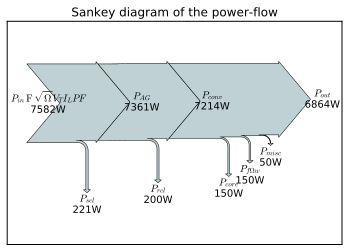

In [22]:
# This demonstrates how to create a simple diagram by implicitly calling the
# Sankey.add() method and by appending finish() to the call to the class.
from matplotlib.sankey import Sankey
sankey = Sankey(unit='W', scale= 1/Pin, format='%.0f', margin=0.25)
sankey.add(flows=[Pin, -Pag, -Pscl],
           labels=['$P_{in}=\sqrt{3}V_TI_LPF$', '$P_{AG}$', '$P_{scl}$'],
           orientations=[ 0, 0, -1],
           pathlengths=[0, 0.1, 0.6])
sankey.add(flows=[Pag, -Pconv, -Prcl],
           labels=[None, '$P_{conv}$',  '$P_{rcl}$'],
           orientations=[ 0, 0, -1],
           pathlengths=[0, 0.1, 0.5],
           prior=0, connect=(1, 0))
sankey.add(flows=[Pconv, -Pout, -Pmisc, -Pf_w, -Pcore],
           labels=[None,'$P_{out}$', '$P_{misc}$', '$P_{f&w}$', '$P_{core}$'],
           orientations=[ 0, 0, -1, -1, -1,],
           pathlengths=[0, 0.1, 0.1, 0.3, 0.45],
           prior=1, connect=(1, 0))
sankey.finish()
title("Sankey diagram of the power-flow");